In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv("df1.csv")
df6 = pd.read_csv("df6.csv") 
df12 = pd.read_csv("df12.csv")

In [3]:
## Creating one step table
test_length= 72 ## 20% Test split
end_point = 360
x = end_point - test_length
data = df1.copy()
data = data.reset_index(drop=True)
data = data[['Date','IF_1']]

data_train1 = data.loc[:x - 1, :]
data_train1['Date'] = pd.to_datetime(data_train1['Date'])
data_train1 = data_train1.set_index("Date")

data_test1 = data.loc[x:, :]
data_test1['Date'] = pd.to_datetime(data_test1['Date'])
data_test1= data_test1.set_index("Date")

<ipython-input-3-65747196c3fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train1['Date'] = pd.to_datetime(data_train1['Date'])
<ipython-input-3-65747196c3fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test1['Date'] = pd.to_datetime(data_test1['Date'])


In [4]:
## Creating 6 step table
test_length= 71 ## 20% Test split
end_point = len(df6)
x = end_point - test_length
data = df6.copy()
data = data.reset_index(drop=True)
data = data[['Date','IF_6']]

data_train6 = data.loc[:x - 1, :]
data_train6['Date'] = pd.to_datetime(data_train6['Date'])
data_train6 = data_train6.set_index("Date")

data_test6 = data.loc[x:, :]
data_test6['Date'] = pd.to_datetime(data_test6['Date'])
data_test6 = data_test6.set_index("Date")

<ipython-input-4-31493bf944d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train6['Date'] = pd.to_datetime(data_train6['Date'])
<ipython-input-4-31493bf944d6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test6['Date'] = pd.to_datetime(data_test6['Date'])


In [5]:
## Creating 12 step table
test_length= 70 ## 20% Test split
end_point = len(df12)
x = end_point - test_length
data = df12.copy()
data = data.reset_index(drop=True)
data = data[['Date','IF_12']]

data_train12 = data.loc[:x - 1, :]
data_train12['Date'] = pd.to_datetime(data_train12['Date'])
data_train12 = data_train12.set_index("Date")

data_test12 = data.loc[x:, :]
data_test12['Date'] = pd.to_datetime(data_test12['Date'])
data_test12 = data_test12.set_index("Date")

<ipython-input-5-76d01c1623f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train12['Date'] = pd.to_datetime(data_train12['Date'])
<ipython-input-5-76d01c1623f7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test12['Date'] = pd.to_datetime(data_test12['Date'])


In [6]:
## Creating one step table
test_length= 72 ## 20% Test split
end_point = 360
x = end_point - test_length
data = df1.copy()
data = data.drop(['Date'], axis=1)
data = data.reset_index(drop=True)

train1 = data.loc[:x - 1, :]
train1_x = train1.loc[:, train1.columns != 'IF_1']
train1_y = train1['IF_1']

test1 = data.loc[x:, :]
test1_x = test1.loc[:, test1.columns != 'IF_1']
test1_y = test1['IF_1']

In [7]:
## Creating 6 step table
test_length= 71 ## 20% Test split
end_point = len(df6)
x = end_point - test_length
print(x)
data = df6.copy()
data = data.drop(['Date'], axis=1)
data = data.reset_index(drop=True)

train6 = data.loc[:x - 1, :]
train6_x = train6.loc[:, train6.columns != 'IF_6']
train6_y = train6['IF_6']

test6 = data.loc[x:, :]
test6_x = test6.loc[:, test6.columns != 'IF_6']
test6_y = test6['IF_6']


284


In [8]:
## Creating 12 step table
test_length= 70 ## 20% Test split
end_point = len(df12)
x = end_point - test_length
print(x)
data = df12.copy()
data = data.drop(['Date'], axis=1)
data = data.reset_index(drop=True)

train12 = data.loc[:x - 1, :]
train12_x = train12.loc[:, train12.columns != 'IF_12']
train12_y = train12['IF_12']

test12 = data.loc[x:, :]
test12_x = test12.loc[:, test12.columns != 'IF_12']
test12_y = test12['IF_12']

279


## Data Visualization

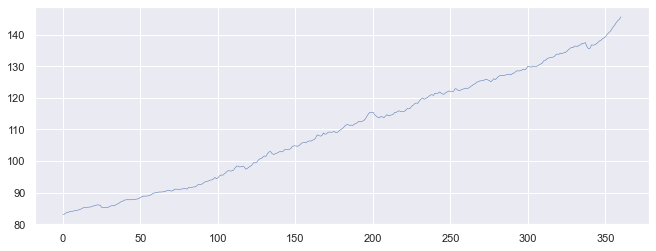

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("balanced_can_md.csv")
sns.set(rc={'figure.figsize':(11, 4)})
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date")
df['CPI_RAW'].plot(linewidth=0.5);

# Random forest with all the other variables

### 1 Step Forecast

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time

print("Starting model train..")
# starting time
start = time.time()

rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1))
fit = rfe.fit(train1_x, train1_y)
y_pred = fit.predict(test1_x)
rf_pred1= y_pred

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")


Starting model train..
Runtime of the program is 452.72108221054077


In [11]:
rf_mse = mean_squared_error(test1_y, y_pred)
print(math.sqrt(rf_mse))

0.0009981556539268887


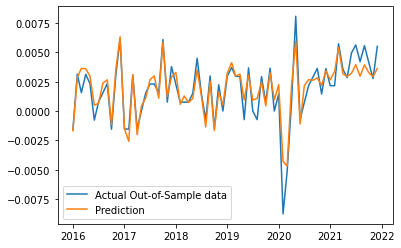

In [12]:
import matplotlib.pyplot as plt
rf_df = pd.DataFrame(y_pred,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test1.index)

plt.plot(data_test1["IF_1"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter tuning
rf = RFE(RandomForestRegressor(random_state=1))
param_grid =  {'estimator__n_estimators': [100,200,300,400],
                                  'estimator__bootstrap': [True,False],
                                  'estimator__max_depth': [None,15, 20],
                                  'estimator__max_features': ['auto', 10],
                                  'estimator__min_samples_leaf': [1,2,5],
                                  'estimator__min_samples_split': [2,3,5]}
clf_rf= RandomizedSearchCV(rf, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(train1_x, train1_y)
performance(best_clf_rf,'Random Forest')

In [ ]:
print(rf.get_params().keys())

In [ ]:
## Best parameters using Hyper parameter tuning 
best_rf = best_clf_rf.best_estimator_


best_rf.fit(train1_x,train1_y)
predictions = best_rf.predict(test1_x)

rf_mse = mean_squared_error(test1_y, predictions)
print(math.sqrt(rf_mse))

In [ ]:
rf_df = pd.DataFrame(predictions,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test1.index)

plt.plot(data_test1["IF_1"], label='In-Sample data')
plt.plot(data_train1["IF_1"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

### 6 Step Forecast

In [13]:
print("Starting model train..")
# starting time
start = time.time()

rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1))
fit = rfe.fit(train6_x, train6_y)
y_pred = fit.predict(test6_x)
rf_pred6= y_pred

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Starting model train..
Runtime of the program is 510.58828949928284


In [14]:
rf_mse = mean_squared_error(test6_y, y_pred)
print(math.sqrt(rf_mse))

0.007455683760502154


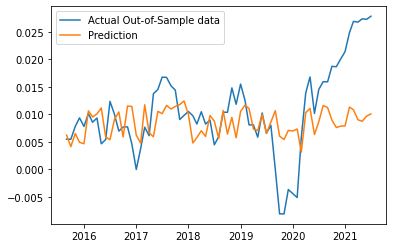

In [15]:
rf_df = pd.DataFrame(y_pred,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test6.index)

plt.plot(data_test6["IF_6"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

In [ ]:
# Hyperparameter tuning
rf = RandomForestClassifier(random_state = 101)
param_grid =  {'n_estimators': [100,200,300,400],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [None,15, 20],
                                  'max_features': ['auto', 10],
                                  'min_samples_leaf': [1,2,5],
                                  'min_samples_split': [2,3,5]}
clf_rf= RandomizedSearchCV(rf,, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fitfit(train6_x, train6_y)
performance(best_clf_rf,'Random Forest')

In [ ]:
## Best parameters using Hyper parameter tuning 
best_rf = best_clf_rf.best_estimator_


best_rf.fit(train6_x,train6_y)
predictions = best_rf.predict(test6_x)

rf_mse = mean_squared_error(test6_y, predictions)
print(math.sqrt(rf_mse))

In [ ]:
rf_df = pd.DataFrame(predictions,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test6.index)

plt.plot(data_test6["IF_6"], label='In-Sample data')
plt.plot(data_train6["IF_6"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

### 12 Step Forecast

In [16]:
print("Starting model train..")
# starting time
start = time.time()

rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1))
fit = rfe.fit(train12_x, train12_y)
y_pred = fit.predict(test12_x)
rf_pred12= y_pred

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Starting model train..
Runtime of the program is 486.766065120697


In [17]:
rf_mse = mean_squared_error(test12_y, y_pred)
print(math.sqrt(rf_mse))

0.010419200399550488


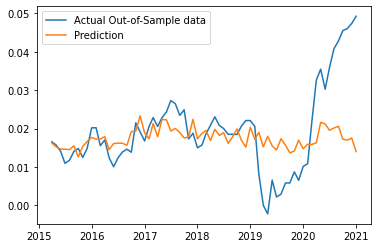

In [18]:
rf_df = pd.DataFrame(y_pred,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test12.index)

plt.plot(data_test12["IF_12"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

In [ ]:
# Hyperparameter tuning
rf = RandomForestClassifier(random_state = 101)
param_grid =  {'n_estimators': [100,200,300,400],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [None,15, 20],
                                  'max_features': ['auto', 10],
                                  'min_samples_leaf': [1,2,5],
                                  'min_samples_split': [2,3,5]}
clf_rf= RandomizedSearchCV(rf,, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fitfit(train12_x, train12_y)
performance(best_clf_rf,'Random Forest')

In [ ]:
## Best parameters using Hyper parameter tuning 
best_rf = best_clf_rf.best_estimator_


best_rf.fit(train12_x,train12_y)
predictions = best_rf.predict(test12_x)

rf_mse = mean_squared_error(test12_y, predictions)
print(math.sqrt(rf_mse))

In [ ]:
rf_df = pd.DataFrame(predictions,columns=["rf_pred"])
rf_df = rf_df.set_index(data_test12.index)

plt.plot(data_train12["IF_1"], label='In-Sample data')
plt.plot(data_test12["IF_1"], label='Actual Out-of-Sample data')
plt.plot(rf_df["rf_pred"], label='Prediction')
plt.legend()

# ARIMA

In [78]:
#building the model(using BIC)
from pmdarima.arima import auto_arima 
model = auto_arima(data_train1, m= 12, trace=True, error_action='ignore', suppress_warnings=True,information_criterion='bic')
model.fit(data_train1)

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=-2606.561, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=-2594.158, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=-2610.261, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=-2619.602, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=-2519.774, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=-2599.869, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=-2620.533, Time=0.71 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=-2613.247, Time=0.43 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : BIC=-2610.593, Time=2.01 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : BIC=-2609.695, Time=2.14 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : BIC=-2626.859, Time=2.20 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : BIC=-2620.786, Time=1.56 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : BIC=-2620.221, Time=2.17 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : BIC=-2620.595, Time=1.21 sec
 ARIM

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [79]:
#building the model(Using AIC)
from pmdarima.arima import auto_arima 
model = auto_arima(data_train1, m= 12, trace=True, error_action='ignore', suppress_warnings=True,information_criterion='aic')
model.fit(data_train1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-2635.865, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-2601.484, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-2624.913, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-2634.254, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-2523.437, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-2636.809, Time=1.00 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-2610.381, Time=0.32 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-2638.650, Time=0.84 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-2626.977, Time=1.79 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=-2640.509, Time=2.27 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-2638.797, Time=2.04 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=-2628.618, Time=1.72 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-2637.705, Time=1.34 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=-2642.573, Time=1.19 sec
 ARIM

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [94]:
forecast = model.predict(n_periods=len(data_test1),m=12)
arima_pred1 = forecast
forecast = pd.DataFrame(forecast,index = data_test1.index,columns=['Prediction'])
forecast

,Prediction
Date,
2016-01-01,-0.000317
2016-02-01,0.000580
2016-03-01,0.002811
2016-04-01,0.001304
2016-05-01,0.000755
...,...
2021-08-01,0.001503
2021-09-01,0.001503
2021-10-01,0.001503


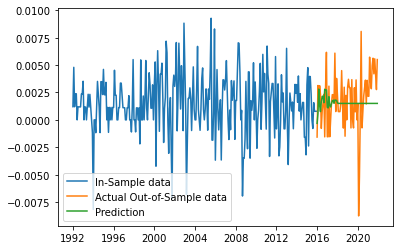

In [95]:
#plot the predictions for validation set
plt.plot(data_test1, label='Actual Out-of-Sample data')
plt.plot(forecast["Prediction"], label='Prediction')
plt.legend()

In [96]:

arima_mse = mean_squared_error(data_test1, forecast)
print(arima_mse)

6.723650885688341e-06


In [97]:
print(math.sqrt(arima_mse))

0.0025930003636113015


In [93]:
arima_pred1

Date
2016-01-01   -0.000317
2016-02-01    0.000580
2016-03-01    0.002811
2016-04-01    0.001304
2016-05-01    0.000755
                ...   
2021-08-01    0.001503
2021-09-01    0.001503
2021-10-01    0.001503
2021-11-01    0.001503
2021-12-01    0.001503
Name: Prediction, Length: 72, dtype: float64

# LSTM

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau #Learning rate scheduler for when we reach plateaus
from keras.layers import Dropout
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# Reset model if we want to re-train with different splits
def reset_weights(model):
    import keras.backend as K
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'): 
            layer.kernel.initializer.run(session=session)
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run(session=session)  


### One-Step

Epoch 1/100
22/22 [==============================] - 23s 710ms/step - loss: 9.2030e-05 - val_loss: 2.0894e-05 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 14s 657ms/step - loss: 1.0046e-05 - val_loss: 6.8948e-06 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 14s 653ms/step - loss: 8.4191e-06 - val_loss: 4.0431e-06 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 14s 651ms/step - loss: 7.4535e-06 - val_loss: 3.6469e-06 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 14s 648ms/step - loss: 7.3660e-06 - val_loss: 5.4316e-06 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 14s 637ms/step - loss: 7.6138e-06 - val_loss: 3.7648e-06 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 14s 635ms/step - loss: 7.3857e-06 - val_loss: 3.3147e-06 - lr: 0.0010
Epoch 8/100
22/22 [==============================] - 14s 627ms/step - loss: 6.1321e-06 - val_loss: 4.0204e-06 - lr: 0.0010
Epoch 9/100
22/2

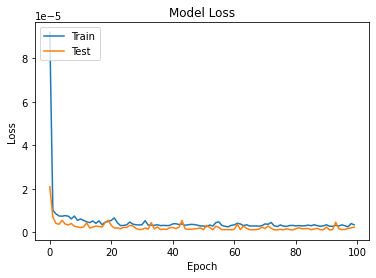

In [20]:
EPOCHS = 100
validation = 0.1

# Instantiate the model
model = Sequential()


model.add(LSTM(units =128, return_sequences=True, input_shape = (train6_x.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units =128,  return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units =128,  return_sequences=False))
model.add(Dropout(0.1))

# Add the output layer, simply one unit
model.add(Dense(units = 1))
model.compile(loss = 'mse', optimizer = 'adam')


# History object for plotting our model loss by epoch
x = train1_x.values.reshape((train1_x.shape[0], train1_x.shape[1],1))
x_test = test1_x.values.reshape((test1_x.shape[0], test1_x.shape[1],1))
y= train1_y.values
y_test = test1_y.values

history = model.fit(x ,y, epochs = EPOCHS,batch_size=12,validation_split = validation, callbacks = [rlrop])
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(test1_x)
lstm_pred1 = y_pred
lstm_mse = mean_squared_error(test1_y, y_pred)
print(math.sqrt(lstm_mse))

0.0015807737573974635


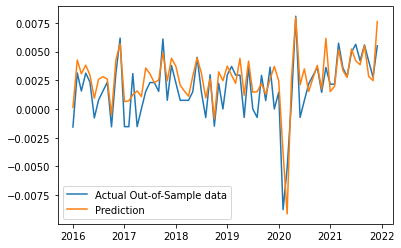

In [22]:
lstm_df = pd.DataFrame(y_pred,columns=["lstm_pred"])
lstm_df = lstm_df.set_index(data_test1.index)

plt.plot(data_test1["IF_1"], label='Actual Out-of-Sample data')
plt.plot(lstm_df["lstm_pred"], label='Prediction')
plt.legend()

### 6 Step

Epoch 1/100
9/9 [==============================] - 16s 1s/step - loss: 1.5009e-04 - val_loss: 7.9984e-05 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 9s 987ms/step - loss: 5.5681e-05 - val_loss: 2.6669e-05 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 9s 1s/step - loss: 4.8538e-05 - val_loss: 2.5977e-05 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 10s 1s/step - loss: 4.7963e-05 - val_loss: 2.6430e-05 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 10s 1s/step - loss: 5.1758e-05 - val_loss: 2.5233e-05 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 11s 1s/step - loss: 5.0365e-05 - val_loss: 2.7671e-05 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 11s 1s/step - loss: 5.0248e-05 - val_loss: 2.5708e-05 - lr: 0.0010
Epoch 8/100
9/9 [==============================] - 13s 1s/step - loss: 4.9840e-05 - val_loss: 3.3895e-05 - lr: 0.0010
Epoch 9/100
9/9 [==============================] - 12s 

Epoch 70/100
9/9 [==============================] - 12s 1s/step - loss: 4.5421e-05 - val_loss: 2.3382e-05 - lr: 0.0010
Epoch 71/100
9/9 [==============================] - 12s 1s/step - loss: 4.5974e-05 - val_loss: 2.3360e-05 - lr: 0.0010
Epoch 72/100
9/9 [==============================] - 12s 1s/step - loss: 4.5766e-05 - val_loss: 2.5180e-05 - lr: 0.0010
Epoch 73/100
9/9 [==============================] - 12s 1s/step - loss: 4.4026e-05 - val_loss: 2.5112e-05 - lr: 0.0010
Epoch 74/100
9/9 [==============================] - 12s 1s/step - loss: 4.8730e-05 - val_loss: 2.4000e-05 - lr: 0.0010
Epoch 75/100
9/9 [==============================] - 12s 1s/step - loss: 4.4673e-05 - val_loss: 2.5690e-05 - lr: 0.0010
Epoch 76/100
9/9 [==============================] - 12s 1s/step - loss: 4.4944e-05 - val_loss: 2.9764e-05 - lr: 0.0010
Epoch 77/100
9/9 [==============================] - 12s 1s/step - loss: 4.3058e-05 - val_loss: 2.6561e-05 - lr: 0.0010
Epoch 78/100
9/9 [==============================

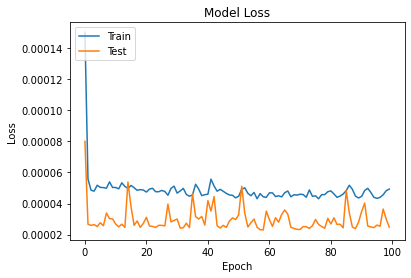

In [23]:
# Epochs and validation split
EPOCHS = 100
validation = 0.1

# Instantiate the model
model = Sequential()


model.add(LSTM(units =128, return_sequences=True, input_shape = (train6_x.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units =128, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units =128, activation='tanh', return_sequences=False))
model.add(Dropout(0.1))

# Add the output layer, simply one unit
model.add(Dense(units = 1))
model.compile(loss = 'mse', optimizer = 'adam')


# History object for plotting our model loss by epoch
x = train6_x.values.reshape((train6_x.shape[0], train6_x.shape[1],1))
x_test = test6_x.values.reshape((test6_x.shape[0], test6_x.shape[1],1))
y= train6_y.values
y_test = test6_y.values

history = model.fit(x ,y, epochs = EPOCHS,batch_size=30,validation_split = validation, callbacks = [rlrop])
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
y_pred = model.predict(test6_x)
lstm_pred6 = y_pred
lstm_mse = mean_squared_error(test6_y, y_pred)
print(math.sqrt(lstm_mse))

0.00829084055970425


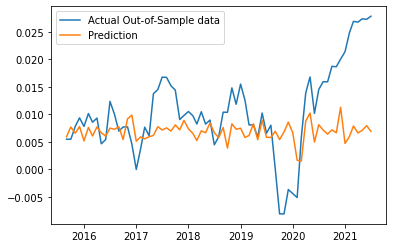

In [25]:
lstm_df = pd.DataFrame(y_pred,columns=["lstm_pred"])
lstm_df = lstm_df.set_index(data_test6.index)

plt.plot(data_test6["IF_6"], label='Actual Out-of-Sample data')
plt.plot(lstm_df["lstm_pred"], label='Prediction')
plt.legend()

### 12-Step

Epoch 1/100
9/9 [==============================] - 21s 2s/step - loss: 1.8350e-04 - val_loss: 1.1518e-04 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 13s 1s/step - loss: 1.0622e-04 - val_loss: 2.5955e-05 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 13s 1s/step - loss: 9.4836e-05 - val_loss: 2.4413e-05 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 13s 1s/step - loss: 8.7934e-05 - val_loss: 4.5949e-05 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 9.1097e-05 - val_loss: 4.5403e-05 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 13s 1s/step - loss: 9.6295e-05 - val_loss: 2.3035e-05 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 13s 1s/step - loss: 9.3677e-05 - val_loss: 3.1757e-05 - lr: 0.0010
Epoch 8/100
9/9 [==============================] - 13s 1s/step - loss: 8.8042e-05 - val_loss: 2.8940e-05 - lr: 0.0010
Epoch 9/100
9/9 [==============================] - 14s 2

Epoch 70/100
9/9 [==============================] - 13s 1s/step - loss: 8.8456e-05 - val_loss: 2.5737e-05 - lr: 0.0010
Epoch 71/100
9/9 [==============================] - 13s 1s/step - loss: 8.9733e-05 - val_loss: 2.6611e-05 - lr: 0.0010
Epoch 72/100
9/9 [==============================] - 13s 1s/step - loss: 8.5057e-05 - val_loss: 2.7478e-05 - lr: 0.0010
Epoch 73/100
9/9 [==============================] - 13s 1s/step - loss: 8.8414e-05 - val_loss: 5.4786e-05 - lr: 0.0010
Epoch 74/100
9/9 [==============================] - 13s 1s/step - loss: 9.0843e-05 - val_loss: 3.7273e-05 - lr: 0.0010
Epoch 75/100
9/9 [==============================] - 13s 1s/step - loss: 8.9571e-05 - val_loss: 2.2761e-05 - lr: 0.0010
Epoch 76/100
9/9 [==============================] - 13s 1s/step - loss: 8.7733e-05 - val_loss: 3.0911e-05 - lr: 0.0010
Epoch 77/100
9/9 [==============================] - 13s 1s/step - loss: 8.6344e-05 - val_loss: 2.4379e-05 - lr: 0.0010
Epoch 78/100
9/9 [==============================

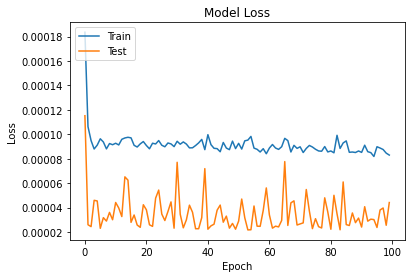

In [26]:
# Epochs and validation split
EPOCHS = 100
validation = 0.1

# Instantiate the model
model = Sequential()


model.add(LSTM(units =128, activation='tanh', return_sequences=True, input_shape = (train12_x.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units =128, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units =128, activation='tanh', return_sequences=False))
model.add(Dropout(0.1))

# Add the output layer, simply one unit
model.add(Dense(units = 1))
model.compile(loss = 'mse', optimizer = 'adam')


# History object for plotting our model loss by epoch
x = train12_x.values.reshape((train12_x.shape[0], train12_x.shape[1],1))
x_test = test12_x.values.reshape((test12_x.shape[0], test12_x.shape[1],1))
y= train12_y.values
y_test = test12_y.values

history = model.fit(x ,y, epochs = EPOCHS,batch_size=30,validation_split = validation, callbacks = [rlrop])
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
y_pred = model.predict(test12_x)
lstm_pred12 = y_pred
lstm_mse = mean_squared_error(test12_y, y_pred)
print(math.sqrt(lstm_mse))

0.010722845173354709


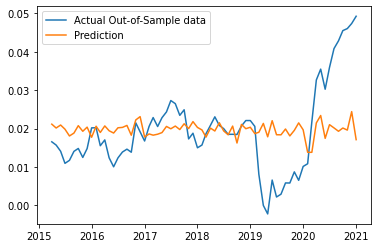

In [28]:
lstm_df = pd.DataFrame(y_pred,columns=["lstm_pred"])
lstm_df = lstm_df.set_index(data_test12.index)

plt.plot(data_test12["IF_12"], label='Actual Out-of-Sample data')
plt.plot(lstm_df["lstm_pred"], label='Prediction')
plt.legend()

## Convert predictions to excel

In [53]:
#lstm_pred12 = lstm_pred12.tolist()
lstm_pred1 = lstm_pred1.reshape(rf_pred1.shape)
lstm_pred6 = lstm_pred6.reshape(rf_pred6.shape)
lstm_pred12 = lstm_pred12.reshape(rf_pred12.shape)

In [364]:
df_lstm1 = pd.DataFrame(lstm_pred1,columns=["lstm_pred1"])
df_lstm6 = pd.DataFrame(lstm_pred6,columns=["lstm_pred6"]) 
df_lstm12 = pd.DataFrame(lstm_pred12,columns=["lstm_pred12"]) 
df_rf1 = pd.DataFrame(rf_pred1,columns=["rf_pred1"]) 
df_rf6 = pd.DataFrame(rf_pred6,columns=["rf_pred6"]) 
df_rf12 = pd.DataFrame(rf_pred12,columns=["rf_pred12"]) 
preds  = pd.concat([df_lstm1, df_lstm6,df_lstm12,df_rf1,df_rf6,df_rf12], axis=1) 

In [366]:
preds.to_csv("pred.csv")

# Pre and Post Covid

In [9]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
preds = pd.read_csv("pred.csv").round(4)
preds

,lstm_pred1,lstm_pred6,lstm_pred12,rf_pred1,rf_pred6,rf_pred12,IF1_PRED,IF6_PRED,IF12_PRED
0,-0.00150000,0.00860000,0.02030000,-0.00170000,0.00630000,0.01630000,0.00150000,0.00810000,0.02110000
1,0.00320000,0.01000000,0.01990000,0.00290000,0.00410000,0.01520000,0.00100000,0.00970000,0.02100000
2,0.00230000,0.00860000,0.01990000,0.00360000,0.00650000,0.01470000,0.00230000,0.00850000,0.02040000
3,0.00250000,0.01000000,0.01870000,0.00360000,0.00490000,0.01460000,0.00120000,0.00890000,0.01990000
4,0.00170000,0.00710000,0.01650000,0.00300000,0.00470000,0.01450000,0.00180000,0.00940000,0.01980000
...,...,...,...,...,...,...,...,...,...
67,0.00260000,0.00960000,0.01860000,0.00300000,0.00900000,0.01700000,0.00190000,0.00730000,0.01870000
68,0.00460000,0.00970000,0.02310000,0.00390000,0.00880000,0.01750000,0.00160000,0.00690000,0.01880000
69,0.00170000,0.01150000,0.01640000,0.00330000,0.00970000,0.01400000,0.00210000,0.00710000,0.01820000
70,0.00110000,0.01030000,nan,0.00290000,0.01010000,nan,0.00170000,0.00710000,nan


In [10]:
ar2_pred1 = preds["IF1_PRED"]
ar2_pred6 = preds["IF6_PRED"][0:71]
ar2_pred12 = preds["IF12_PRED"][0:70]

lstm_pred1 = preds["lstm_pred1"]
lstm_pred6 = preds["lstm_pred6"][0:71]
lstm_pred12 = preds["lstm_pred12"][0:70]

rf_pred1 = preds["rf_pred1"]
rf_pred6 = preds["rf_pred6"][0:71]
rf_pred12 = preds["rf_pred12"][0:70]

In [11]:
#Pre Covid & Post Covid in ONE-STEP
pre_covid1 = data_test1.index[data_test1.index <= "2019-12-01"]
post_covid1 = data_test1.index[data_test1.index > "2019-12-01"]

#Pre Covid & Post Covid in SIX-STEP
pre_covid6 = data_test6.index[data_test6.index <= "2019-12-01"]
post_covid6 = data_test6.index[data_test6.index > "2019-12-01"]

#Pre Covid & Post Covid in 12-STEP
pre_covid12 = data_test12.index[data_test12.index <= "2019-12-01"]
post_covid12 = data_test12.index[data_test12.index > "2019-12-01"]

print(len(pre_covid1))
print(len(pre_covid6))
print(len(pre_covid12))

48
52
57


## One step plot

0.002078438365521972


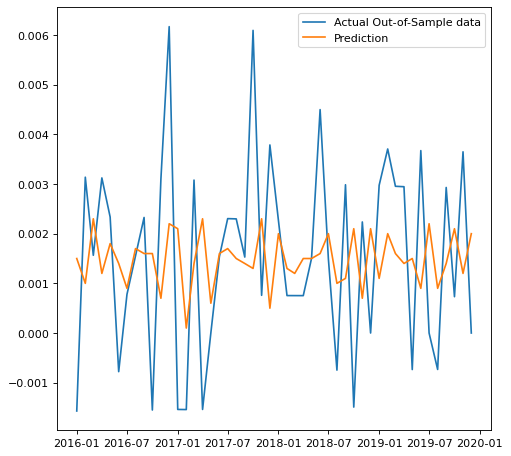

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(7, 7), dpi=80)
# Pre Covid AR2
ar2_df1 = pd.DataFrame(ar2_pred1[0:len(pre_covid1)].values ,columns=["ar2_pred1"])
ar2_df1 = ar2_df1.set_index(pre_covid1)
plt.plot(data_test1["IF_1"][0:len(pre_covid1)], label='Actual Out-of-Sample data')
plt.plot(ar2_df1["ar2_pred1"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test1["IF_1"][0:len(pre_covid1)], ar2_pred1[0:len(pre_covid1)])
print(math.sqrt(ar2_mse))

0.0034574144196200473


<Figure size 560x560 with 0 Axes>

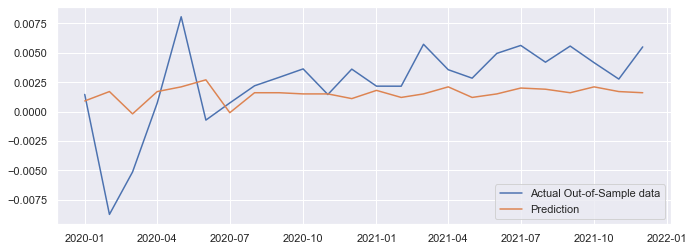

<Figure size 560x560 with 0 Axes>

In [20]:
# Post Covid AR2
ar2_df1 = pd.DataFrame(ar2_pred1[len(pre_covid1):len(ar2_pred1)].values ,columns=["ar2_pred1"])
ar2_df1 = ar2_df1.set_index(post_covid1)
plt.plot(data_test1["IF_1"][len(pre_covid1):len(ar2_pred1)], label='Actual Out-of-Sample data')
plt.plot(ar2_df1["ar2_pred1"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test1["IF_1"][len(pre_covid1):len(ar2_pred1)], ar2_pred1[len(pre_covid1):len(ar2_pred1)])
print(math.sqrt(ar2_mse))
figure(figsize=(7, 7), dpi=80)

0.0007101714770206178


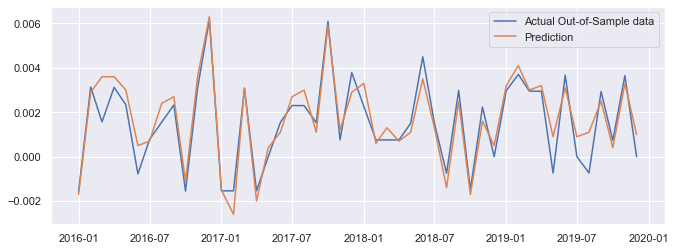

In [25]:
# Pre Covid RF
rf_df1 = pd.DataFrame(rf_pred1[0:len(pre_covid1)].values ,columns=["rf_pred1"])
rf_df1 = rf_df1.set_index(pre_covid1)
plt.plot(data_test1["IF_1"][0:len(pre_covid1)], label='Actual Out-of-Sample data')
plt.plot(rf_df1["rf_pred1"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test1["IF_1"][0:len(pre_covid1)], rf_pred1[0:len(pre_covid1)])
print(math.sqrt(rf_mse))

0.0014081157276054973


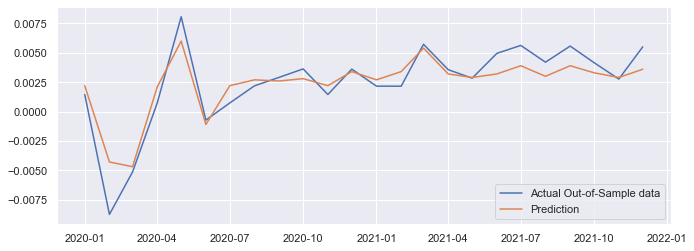

In [26]:
# Post Covid RF
rf_df1 = pd.DataFrame(rf_pred1[len(pre_covid1):len(rf_pred1)].values ,columns=["rf_pred1"])
rf_df1 = rf_df1.set_index(post_covid1)
plt.plot(data_test1["IF_1"][len(pre_covid1):len(rf_pred1)], label='Actual Out-of-Sample data')
plt.plot(rf_df1["rf_pred1"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test1["IF_1"][len(pre_covid1):len(ar2_pred1)], rf_pred1[len(pre_covid1):len(ar2_pred1)])
print(math.sqrt(rf_mse))

0.0011198974551747938


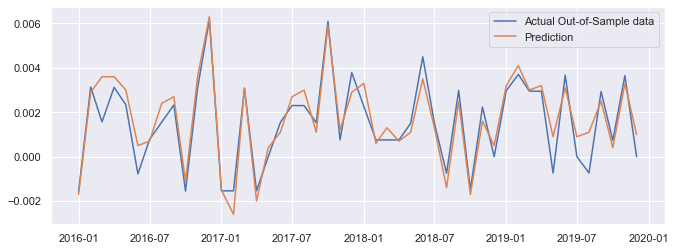

In [31]:
# Pre Covid LSTM
lstm_df1 = pd.DataFrame(rf_pred1[0:len(pre_covid1)].values ,columns=["lstm_pred1"])
lstm_df1 = lstm_df1.set_index(pre_covid1)
plt.plot(data_test1["IF_1"][0:len(pre_covid1)], label='Actual Out-of-Sample data')
plt.plot(lstm_df1["lstm_pred1"], label='Prediction')
plt.legend()

lstm_mse = mean_squared_error(data_test1["IF_1"][0:len(pre_covid1)], lstm_pred1[0:len(pre_covid1)])
print(math.sqrt(lstm_mse))

0.0020571351140189985


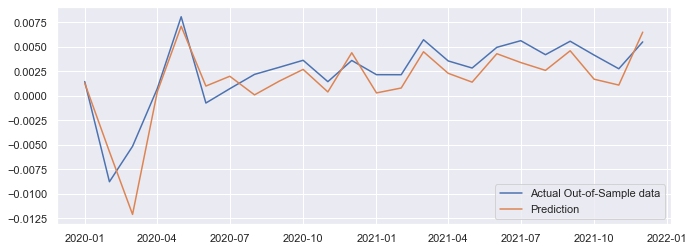

In [32]:
# Post Covid LSTM
lstm_df1 = pd.DataFrame(lstm_pred1[len(pre_covid1):len(rf_pred1)].values ,columns=["lstm_pred1"])
lstm_df1 = lstm_df1.set_index(post_covid1)
plt.plot(data_test1["IF_1"][len(pre_covid1):len(rf_pred1)], label='Actual Out-of-Sample data')
plt.plot(lstm_df1["lstm_pred1"], label='Prediction')
plt.legend()

lstm_mse = mean_squared_error(data_test1["IF_1"][len(pre_covid1):len(ar2_pred1)], lstm_pred1[len(pre_covid1):len(ar2_pred1)])
print(math.sqrt(lstm_mse))

## 6 Step

0.005341720775131247


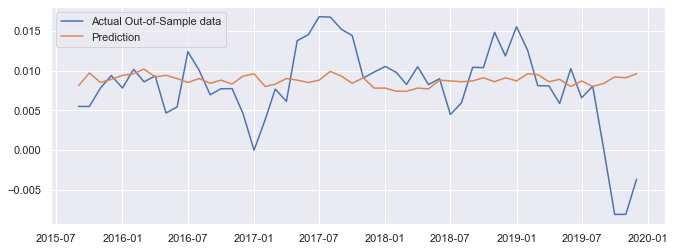

In [21]:
# Pre Covid AR2
ar2_df6 = pd.DataFrame(ar2_pred6[0:len(pre_covid6)].values ,columns=["ar2_pred6"])
ar2_df6 = ar2_df6.set_index(pre_covid6)
plt.plot(data_test6["IF_6"][0:len(pre_covid6)], label='Actual Out-of-Sample data')
plt.plot(ar2_df6["ar2_pred6"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test6["IF_6"][0:len(pre_covid6)], ar2_pred6[0:len(pre_covid6)])
print(math.sqrt(ar2_mse))

0.013478471122054612


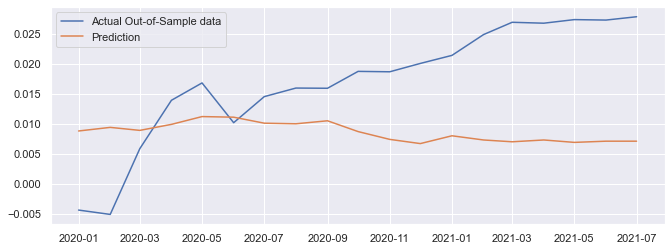

In [22]:
# Post Covid AR2
ar2_df6 = pd.DataFrame(ar2_pred6[len(pre_covid6):len(ar2_pred6)].values ,columns=["ar2_pred6"])
ar2_df6 = ar2_df6.set_index(post_covid6)
plt.plot(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], label='Actual Out-of-Sample data')
plt.plot(ar2_df6["ar2_pred6"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], ar2_pred6[len(pre_covid6):len(ar2_pred6)])
print(math.sqrt(ar2_mse))

0.004891196861262345


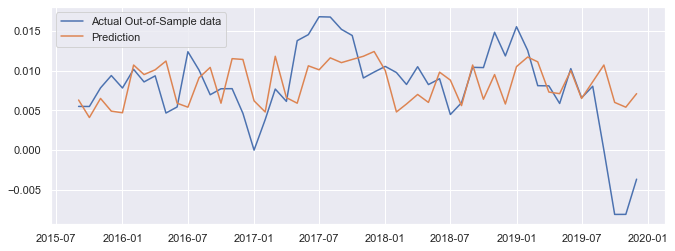

In [27]:
# Pre Covid RF
rf_df6 = pd.DataFrame(rf_pred6[0:len(pre_covid6)].values ,columns=["rf_pred6"])
rf_df6 = rf_df6.set_index(pre_covid6)
plt.plot(data_test6["IF_6"][0:len(pre_covid6)], label='Actual Out-of-Sample data')
plt.plot(rf_df6["rf_pred6"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test6["IF_6"][0:len(pre_covid6)], rf_pred6[0:len(pre_covid6)])
print(math.sqrt(rf_mse))

0.011926792382065777


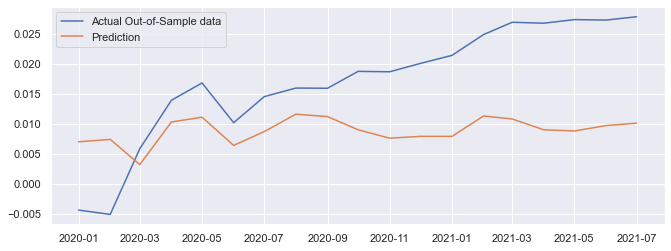

In [28]:
# Post Covid RF
rf_df6 = pd.DataFrame(rf_pred6[len(pre_covid6):len(ar2_pred6)].values ,columns=["rf_pred6"])
rf_df6 = rf_df6.set_index(post_covid6)
plt.plot(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], label='Actual Out-of-Sample data')
plt.plot(rf_df6["rf_pred6"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], rf_pred6[len(pre_covid6):len(ar2_pred6)])
print(math.sqrt(rf_mse))

0.005224331011372829


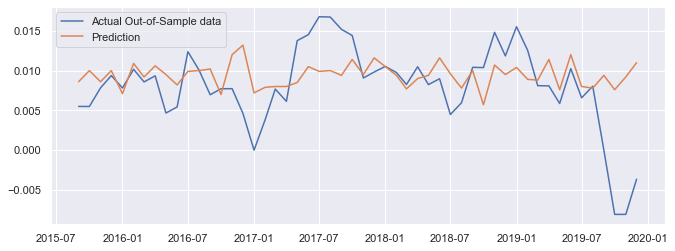

In [33]:
# Pre Covid LSTM
lstm_df6 = pd.DataFrame(lstm_pred6[0:len(pre_covid6)].values ,columns=["lstm_pred6"])
lstm_df6 = lstm_df6.set_index(pre_covid6)
plt.plot(data_test6["IF_6"][0:len(pre_covid6)], label='Actual Out-of-Sample data')
plt.plot(lstm_df6["lstm_pred6"], label='Prediction')
plt.legend()

lstm_mse = mean_squared_error(data_test6["IF_6"][0:len(pre_covid6)], lstm_pred6[0:len(pre_covid6)])
print(math.sqrt(lstm_mse))

0.011374882443286457


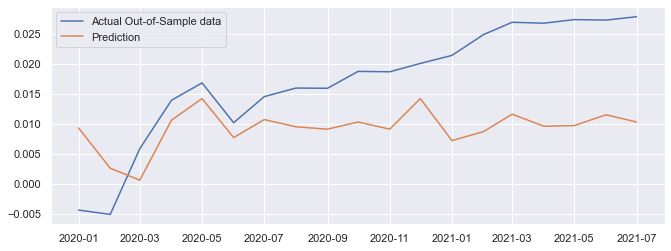

In [34]:
# Post Covid LSTM
lstm_df6 = pd.DataFrame(lstm_pred6[len(pre_covid6):len(ar2_pred6)].values ,columns=["lstm_pred6"])
lstm_df6 = lstm_df6.set_index(post_covid6)
plt.plot(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], label='Actual Out-of-Sample data')
plt.plot(lstm_df6["lstm_pred6"], label='Prediction')
plt.legend()

lstm_mse = mean_squared_error(data_test6["IF_6"][len(pre_covid6):len(ar2_pred6)], lstm_pred6[len(pre_covid6):len(ar2_pred6)])
print(math.sqrt(lstm_mse))

## 12-Step

0.007190432210954232


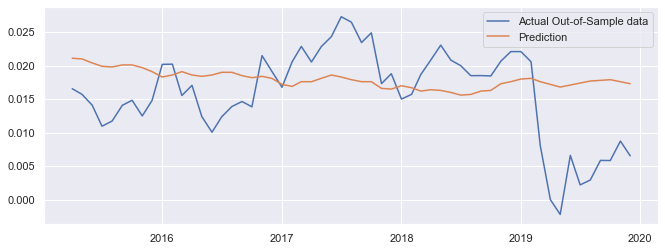

In [23]:
# Pre Covid AR2
ar2_df12 = pd.DataFrame(ar2_pred12[0:len(pre_covid12)].values ,columns=["ar2_pred12"])
ar2_df12 = ar2_df12.set_index(pre_covid12)
plt.plot(data_test12["IF_12"][0:len(pre_covid12)], label='Actual Out-of-Sample data')
plt.plot(ar2_df12["ar2_pred12"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test12["IF_12"][0:len(pre_covid12)], ar2_pred12[0:len(pre_covid12)])
print(math.sqrt(ar2_mse))

0.019535916588382083


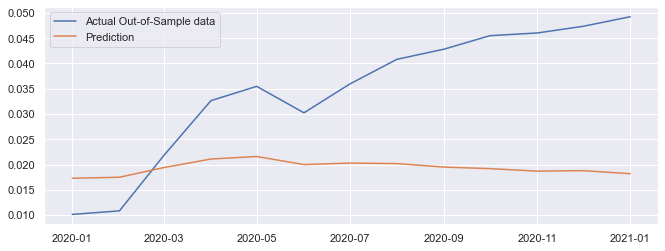

In [24]:
# Post Covid AR2
ar2_df12 = pd.DataFrame(ar2_pred12[len(pre_covid12):len(ar2_pred12)].values ,columns=["ar2_pred12"])
ar2_df12 = ar2_df12.set_index(post_covid12)
plt.plot(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], label='Actual Out-of-Sample data')
plt.plot(ar2_df12["ar2_pred12"], label='Prediction')
plt.legend()

ar2_mse = mean_squared_error(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], ar2_pred12[len(pre_covid12):len(ar2_pred12)])
print(math.sqrt(ar2_mse))

0.0059494656553203944


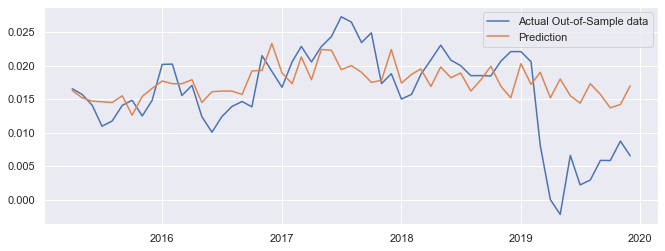

In [29]:
# Pre Covid RF
rf_df12 = pd.DataFrame(rf_pred12[0:len(pre_covid12)].values ,columns=["rf_pred12"])
rf_df12 = rf_df12.set_index(pre_covid12)
plt.plot(data_test12["IF_12"][0:len(pre_covid12)], label='Actual Out-of-Sample data')
plt.plot(rf_df12["rf_pred12"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test12["IF_12"][0:len(pre_covid12)], rf_pred12[0:len(pre_covid12)])
print(math.sqrt(rf_mse))

0.02072415691247385


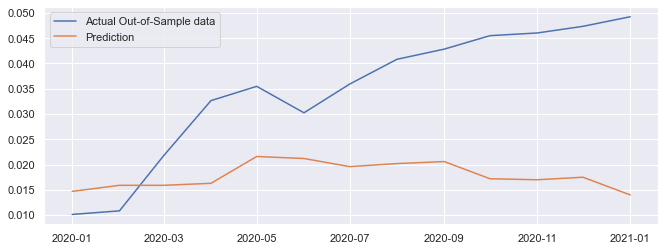

In [30]:
# Post Covid RF
rf_df12 = pd.DataFrame(rf_pred12[len(pre_covid12):len(ar2_pred12)].values ,columns=["rf_pred12"])
rf_df12 = rf_df12.set_index(post_covid12)
plt.plot(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], label='Actual Out-of-Sample data')
plt.plot(rf_df12["rf_pred12"], label='Prediction')
plt.legend()

rf_mse = mean_squared_error(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], rf_pred12[len(pre_covid12):len(ar2_pred12)])
print(math.sqrt(rf_mse))

0.007193377910222396


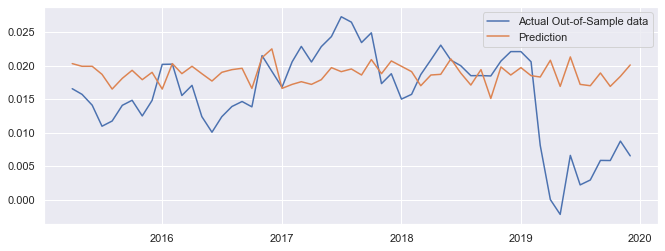

In [35]:
# Pre Covid LSTM
lstm_df12 = pd.DataFrame(lstm_pred12[0:len(pre_covid12)].values ,columns=["lstm_pred12"])
lstm_df12 = lstm_df12.set_index(pre_covid12)
plt.plot(data_test12["IF_12"][0:len(pre_covid12)], label='Actual Out-of-Sample data')
plt.plot(lstm_df12["lstm_pred12"], label='Prediction')
plt.legend()


lstm_mse = mean_squared_error(data_test12["IF_12"][0:len(pre_covid12)], lstm_pred12[0:len(pre_covid12)])
print(math.sqrt(lstm_mse))

0.01981851179759215


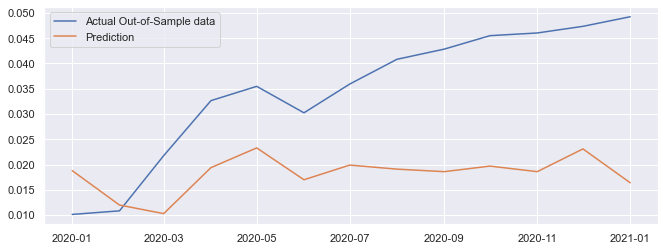

In [36]:
# Post Covid LSTM
lstm_df12 = pd.DataFrame(lstm_pred12[len(pre_covid12):len(ar2_pred12)].values ,columns=["lstm_pred12"])
lstm_df12 = lstm_df12.set_index(post_covid12)
plt.plot(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], label='Actual Out-of-Sample data')
plt.plot(lstm_df12["lstm_pred12"], label='Prediction')
plt.legend()

lstm_mse = mean_squared_error(data_test12["IF_12"][len(pre_covid12):len(ar2_pred12)], lstm_pred12[len(pre_covid12):len(ar2_pred12)])
print(math.sqrt(lstm_mse))

# Diebold-Mariano Test

In [13]:
def diebold_mariano_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
               #print(s.isdigit())
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                #print(is_actual_ok)
                #print(is_pred1_ok)
                #print(is_pred2_ok)
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [15]:
#One step(Pre covid)
rt = diebold_mariano_test(test1_y[0:len(pre_covid1)],preds["lstm_pred1"][0:len(pre_covid1)],preds["rf_pred1"][0:len(pre_covid1)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test1_y[0:len(pre_covid1)],preds["IF1_PRED"][0:len(pre_covid1)],preds["lstm_pred1"][0:len(pre_covid1)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test1_y[0:len(pre_covid1)],preds["IF1_PRED"][0:len(pre_covid1)],preds["rf_pred1"][0:len(pre_covid1)],h = 1, crit="MSE")
print(rt)

dm_return(DM=2.30780401339568, p_value=0.025460184754287588)
dm_return(DM=4.3295449244985145, p_value=7.773344805557496e-05)
dm_return(DM=5.10231124199499, p_value=5.947114756291369e-06)


In [94]:
#One step(Post covid)
rt = diebold_mariano_test(test1_y[len(pre_covid1):len(ar2_pred1)],preds["lstm_pred1"][len(pre_covid1):len(ar2_pred1)],preds["rf_pred1"][len(pre_covid1):len(ar2_pred1)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test1_y[len(pre_covid1):len(ar2_pred1)],preds["lstm_pred1"][len(pre_covid1):len(ar2_pred1)], preds["IF1_PRED"][len(pre_covid1):len(ar2_pred1)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test1_y[len(pre_covid1):len(ar2_pred1)],preds["rf_pred1"][len(pre_covid1):len(ar2_pred1)], preds["IF1_PRED"][len(pre_covid1):len(ar2_pred1)],h = 1, crit="MSE")
print(rt)


dm_return(DM=1.0727920649845044, p_value=0.29449195604864997)
dm_return(DM=-1.697095862400757, p_value=0.10317176809564431)
dm_return(DM=-2.5789208840366817, p_value=0.01678226569830903)


In [95]:
#6 step(pre covid)
rt = diebold_mariano_test(test6_y[0:len(pre_covid6)],preds["lstm_pred6"][0:len(pre_covid6)],preds["rf_pred6"][0:len(pre_covid6)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test6_y[0:len(pre_covid6)],preds["lstm_pred6"][0:len(pre_covid6)], preds["IF6_PRED"][0:len(pre_covid6)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test6_y[0:len(pre_covid6)],preds["rf_pred6"][0:len(pre_covid6)], preds["IF6_PRED"][0:len(pre_covid6)],h = 1, crit="MSE")
print(rt)

dm_return(DM=0.9324108686616648, p_value=0.35551755437034993)
dm_return(DM=-0.5702862429648708, p_value=0.570987601430012)
dm_return(DM=-1.1841496932416975, p_value=0.24184341800435671)


In [96]:
#6 step(post covid)
rt = diebold_mariano_test(test6_y[len(pre_covid6):len(ar2_pred6)],preds["lstm_pred6"][len(pre_covid6):len(ar2_pred6)],preds["rf_pred6"][len(pre_covid6):len(ar2_pred6)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test6_y[len(pre_covid6):len(ar2_pred6)],preds["lstm_pred6"][len(pre_covid6):len(ar2_pred6)], preds["IF6_PRED"][len(pre_covid6):len(ar2_pred6)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test6_y[len(pre_covid6):len(ar2_pred6)],preds["rf_pred6"][len(pre_covid6):len(ar2_pred6)], preds["IF6_PRED"][len(pre_covid6):len(ar2_pred6)],h = 1, crit="MSE")
print(rt)

dm_return(DM=-1.2079923268433905, p_value=0.2426826430561071)
dm_return(DM=-3.3597036643407288, p_value=0.0034892371072467836)
dm_return(DM=-3.4837018293263253, p_value=0.0026509269363532034)


In [97]:
#12 Step(pre covid)
rt = diebold_mariano_test(test12_y[0:len(pre_covid12)],preds["lstm_pred12"][0:len(pre_covid12)],preds["rf_pred12"][0:len(pre_covid12)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test12_y[0:len(pre_covid12)],preds["lstm_pred12"][0:len(pre_covid12)], preds["IF12_PRED"][0:len(pre_covid12)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test12_y[0:len(pre_covid12)],preds["rf_pred12"][0:len(pre_covid12)], preds["IF12_PRED"][0:len(pre_covid12)],h = 1, crit="MSE")
print(rt)

dm_return(DM=3.153460652690773, p_value=0.0025934680307826592)
dm_return(DM=0.011151804236698266, p_value=0.9911419663748147)
dm_return(DM=-4.813620518275668, p_value=1.1629954572913563e-05)


In [99]:
#12 Step
rt = diebold_mariano_test(test12_y[len(pre_covid12):len(ar2_pred12)],preds["lstm_pred12"][len(pre_covid12):len(ar2_pred12)],preds["rf_pred12"][len(pre_covid12):len(ar2_pred12)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test12_y[len(pre_covid12):len(ar2_pred12)],preds["lstm_pred12"][len(pre_covid12):len(ar2_pred12)], preds["IF12_PRED"][len(pre_covid12):len(ar2_pred12)],h = 1, crit="MSE")
print(rt)

rt = diebold_mariano_test(test12_y[len(pre_covid12):len(ar2_pred12)],preds["rf_pred12"][len(pre_covid12):len(ar2_pred12)], preds["IF12_PRED"][len(pre_covid12):len(ar2_pred12)],h = 1, crit="MSE")
print(rt)

dm_return(DM=-1.1112102167987343, p_value=0.2882465099316187)
dm_return(DM=0.4507477891001984, p_value=0.6602076125339802)
dm_return(DM=1.9070271301825361, p_value=0.08073612519467227)


In [21]:
ar_mse = mean_squared_error(test1_y, preds["IF1_PRED"])
print(math.sqrt(ar_mse))

ar_mse6 = mean_squared_error(test6_y, preds["IF6_PRED"][0:71])
print(math.sqrt(ar_mse6))

ar_mse12 = mean_squared_error(test12_y, preds["IF12_PRED"][0:70])
print(math.sqrt(ar_mse12))



0.0026200207726621762
0.008337495060391314
0.010629143532897517


# Feature selection

In [75]:
#Correlation with output variabl
cor = data.corr()
cor_target = abs(cor["CPI_ALL_CAN"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
print(len(relevant_features))

48


In [74]:
for x in relevant_features.keys():
    print(x)

CPI_ALL_CAN
CPI_SHEL_CAN
CPI_MINUS_FOO_CAN
CPI_MINUS_FEN_CAN
CPI_GOO_CAN
CPI_SERV_CAN
IPPI_ENER_CAN
CPI_ALL_NF
CPI_MINUS_FOO_NF
CPI_GOO_NF
CPI_ALL_PEI
CPI_MINUS_FOO_PEI
CPI_MINUS_FEN_PEI
CPI_GOO_PEI
CPI_ALL_NS
CPI_MINUS_FOO_NS
CPI_MINUS_FEN_NS
CPI_GOO_NS
CPI_ALL_NB
CPI_MINUS_FOO_NB
CPI_MINUS_FEN_NB
CPI_GOO_NB
CPI_ALL_QC
CPI_MINUS_FOO_QC
CPI_MINUS_FEN_QC
CPI_GOO_QC
CPI_SERV_QC
CPI_ALL_ONT
CPI_MINUS_FOO_ONT
CPI_MINUS_FEN_ONT
CPI_GOO_ONT
CPI_SERV_ONT
CPI_ALL_MAN
CPI_MINUS_FOO_MAN
CPI_MINUS_FEN_MAN
CPI_GOO_MAN
CPI_ALL_SAS
CPI_MINUS_FOO_SAS
CPI_MINUS_FEN_SAS
CPI_GOO_SAS
CPI_ALL_ALB
CPI_MINUS_FOO_ALB
CPI_MINUS_FEN_ALB
CPI_GOO_ALB
CPI_ALL_BC
CPI_MINUS_FOO_BC
CPI_MINUS_FEN_BC
CPI_GOO_BC


In [86]:
data_lag = data.copy()

# lagged variables
for x in data_lag.columns:
    for i in range(1,7):
        name = x + "_lag_" + str(i)
        temp_num = i * -1
        data_lag[name] = data_lag[x].shift(temp_num)

cor = data_lag.corr()
cor_target = abs(cor["CPI_ALL_CAN"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
print(len(relevant_features))

48


In [82]:
cor

,GDP_new,BSI_new,GPI_new,SPI_new,IP_new,NDM_new,DM_new,OILP_new,CON_new,RT_new,...,CPI_DUR_BC_lag_3,CPI_DUR_BC_lag_4,CPI_DUR_BC_lag_5,CPI_DUR_BC_lag_6,CPI_SERV_BC_lag_1,CPI_SERV_BC_lag_2,CPI_SERV_BC_lag_3,CPI_SERV_BC_lag_4,CPI_SERV_BC_lag_5,CPI_SERV_BC_lag_6
GDP_new,1.000000,0.994732,0.882893,0.941680,0.818036,0.718746,0.862088,0.358854,0.658369,0.771543,...,-0.005765,0.038184,0.012614,-0.018516,0.010218,-0.059937,-0.038997,-0.001512,-0.013816,-0.017183
BSI_new,0.994732,1.000000,0.898000,0.922866,0.834514,0.727476,0.865778,0.376360,0.664263,0.774767,...,-0.003761,0.039117,0.015795,-0.023741,-0.001665,-0.064617,-0.049215,-0.008355,-0.021901,-0.016953
GPI_new,0.882893,0.898000,1.000000,0.675579,0.947734,0.756923,0.847169,0.551321,0.676171,0.599982,...,-0.011874,0.057497,0.011864,-0.016836,0.001819,-0.076238,-0.026859,0.002132,-0.044064,-0.016061
SPI_new,0.941680,0.922866,0.675579,1.000000,0.608264,0.588571,0.749031,0.173060,0.558219,0.784492,...,0.000046,0.020952,0.009638,-0.017561,0.013042,-0.035576,-0.038906,-0.004361,0.016013,-0.015148
IP_new,0.818036,0.834514,0.947734,0.608264,1.000000,0.766466,0.810749,0.625845,0.457786,0.513253,...,-0.011595,0.060895,0.014746,-0.015864,0.008644,-0.058636,-0.031112,-0.016543,-0.059535,-0.015734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPI_SERV_BC_lag_2,-0.059937,-0.064617,-0.076238,-0.035576,-0.058636,-0.090515,-0.085526,0.034285,-0.055727,-0.083020,...,-0.014199,-0.037818,0.020228,0.118243,0.135164,1.000000,0.123434,0.208581,0.133789,0.037634
CPI_SERV_BC_lag_3,-0.038997,-0.049215,-0.026859,-0.038906,-0.031112,0.011315,0.002669,-0.070886,-0.033837,-0.023910,...,0.015034,-0.013616,-0.047106,0.016332,0.215516,0.123434,1.000000,0.114208,0.202798,0.119994
CPI_SERV_BC_lag_4,-0.001512,-0.008355,0.002132,-0.004361,-0.016543,-0.022156,0.003712,-0.005694,0.020287,0.036034,...,-0.016511,0.015544,-0.019526,-0.049963,0.139316,0.208581,0.114208,1.000000,0.109661,0.194646
CPI_SERV_BC_lag_5,-0.013816,-0.021901,-0.044064,0.016013,-0.059535,-0.059795,-0.033832,-0.036356,0.015750,-0.032257,...,0.164258,-0.016201,0.011311,-0.021545,0.050277,0.133789,0.202798,0.109661,1.000000,0.103010
